<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2018, семинар 7 (ДРАФТ)</span> 

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Linear models
<h3> Plan </h3>


* **SVM: theory (20 minute) **

 - Learning algorithm
 - Kernel Trick
 - MultiClasss SVM
 
 
* **SVM: example of realization (40 minute) **
 - SVM в Sklearn
 - Реализация simple SVM
 - True SVM
 
 
* ** Use cases (20 minute)**
 - Use case: Budget optimization
 - HW2: solution
 - HW5: explanation  

In [4]:
import os
import numpy as np
import seaborn as sns
# import _pickle as pickle  # use for Python 2: import cPickle as pickle
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from matplotlib.pyplot import plot, contourf, clabel, contour

from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups, make_classification

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
import random
# from IPython.display import Image, SVG
from scipy import optimize

-------
<h1 align="center">SVM</h1> 

# SVM для линейных выборок

** Вопросы **
* Какая функция штрафа используется в SVM?
* Какой метод регуляризации используется в SVM? 
* В чём основная идея SVM? 
* Что такое 
    - разделяющая гиперплоскость
    - опорный вектор
    - Margin?
* Как обучаются $w$ методом SVM?

<center> Svm_max_sep_hyperplane_with_margin.png </center>
<img src="http://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width="50%">

## $$ L_i = \sum_{j, j \neq y_i} max(0, w_j^tx - w_{y_i}^tx + 1)$$

### Quadratic Programming (QP) Problem:

## $$ b = w_0 $$

## $$ \min_{i = 1, \ldots, l} y_i (<w, x_i> - w_0)  = 1 $$

Linear Separability

## \begin{cases}
    <w, w> \to \min\limits_{w} \\
    y_i (<w, x_i> - w_0) \geq 1, i = 1, \ldots, l
\end{cases}

Linear Inseparability

## \begin{cases}
    \frac{1}{2} <w, w> + C \sum\limits_{i=1}^{l} \xi_i \to \min\limits_{w, \xi} \\
    y_i (<w, x_i> - w_0) \geq 1 - \xi_i, i = 1, \ldots, l \\
    \xi_i \geq 0, i = 1, \ldots, l
\end{cases}

## Linear Model Equivalence

$$ Q(w, w_0) = \sum\limits_{i=1}^{l} (1 - M_i(w, w_0))_{+} + \frac{1}{2C} {\|w\|}^2 \to \min\limits_{w, w_0} $$

### Dual Form

Before:
## \begin{cases}
    \sum f(x_i) \to \min\limits_{x} \\
    h(x_i) \geq 0, i = 1, \ldots, n
\end{cases}

After:
## \begin{cases}
    \sum f(x_i) - \lambda_i h(x_i) \to \min\limits_{x} \max\limits_{\lambda} \\
    h(x_i) \geq 0, i = 1, \ldots, n \\
    \lambda_i \geq 0, i = 1, \ldots, n \\
    \lambda_i = 0 \ or \  h(x_i) = 0 \ (\sum \lambda_i h(x_i) = 0)
\end{cases}

Calculate derivatives over x and see corollary.


## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j <x_i, x_j> \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### Decision Rule

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i <x_i, x> - w_0 \right) $$
## $$ w_0 = med \{ <w, x_i> - y_i \ |\  \lambda_i > 0 \} $$


--------
# Non-Linear SVM (Kernel Trick)

** Вопросы **
  * Как с помощью SVM разделить нелинейную выборку?
  * Что такое ядро?
  * Примеры ядер?
  * Как строить ядра?
  * Применение ядер для классификации нелинейных выборок

Kernel fuction 
## $$ K : X \times X \to R $$ 
if $ K(x, x') = <\phi(x), \phi(x')> $, where $ \phi : X \to H $ and H is space with inner product

### Kernel_Machine
<img src="http://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png" width="80%">

** Kernel trick **
## \begin{cases}
    -\sum\limits_{i=1}^{l} \lambda_i + \frac{1}{2} \sum\limits_{i=1}^{l} \sum\limits_{j=1}^{l} \lambda_i \lambda_j y_i y_j \color{red}{K(x_i, x_j)} \to \min\limits_{\lambda} \\
    \sum\limits_{i=1}^{l} \lambda_i y_i = 0 \\
    0 \leq \lambda_i \leq C, i = 1, \ldots, l
\end{cases}

### $$ a(x) = sign \left(\sum\limits_{i = 1}^{l} \lambda_i y_i \color{red}{K(x_i, x)} - w_0 \right) $$
## $$ w_0 = med \{ \color{red}{K(w, x_i)}<w, x_i> - y_i \ |\  \lambda_i > 0 \} $$

### Kernel and Building kernels
<img src='https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/Kernel.PNG' align="left" width="70%">

<!---                             .
                            T
                           ( )
                          <===>
                           F|J
                           ===
                          J|||F
                          F|||J
                         /\/ \/\
                         F+++++J
                        J{}{|}{}F         .
                     .  F{}{|}{}J         T
          .          T J{}{}|{}{}F        ;;
          T         /|\F/\/\|/\/\J  .   ,;;;;.
         /:\      .'/|\\:=========F T ./;;;;;;\
       ./:/:/.   ///|||\\\"""""""" /x\T\;;;;;;/
      //:/:/:/\  \\\\|////..[ ]...xXXXx.|====|
      \:/:/:/:T7 :.:.:.:.:||[ ]|/xXXXXXx\|||||
      ::.:.:.:A. `;:;:;:;'=== ==\XXXXXXX/=====.
      `;""::/xxx\.|,|,|,| ( ) ( )| | | |.=..=.|
       :. :`\xxx/(_)(_)(_) _   _ | | | |'-''-'|
       :T-'-.:"":|"""""""|/ \ / \|=====|======|
       .A."""||_|| ,. .. || | | |/\/\/\/ | | ||
   :;:////\:::.'.| || || ||-| |-|/\/\/\+|+| | |
  ;:;;\////::::,='======='=============/\/\=====.
 :;:::;""":::::;:|__..,__|============/||\|\====|
 :::::;|=:::;:;::|,;:::::          |========|   |
 ::l42::::::(}:::::;::::::_________|========|___|_
--->

### Example of Kernels
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/KernelExample.PNG" align="left" width="60%">

** Задача 1**:  Какое ядро приведёт к линеаризации следующего датасета?

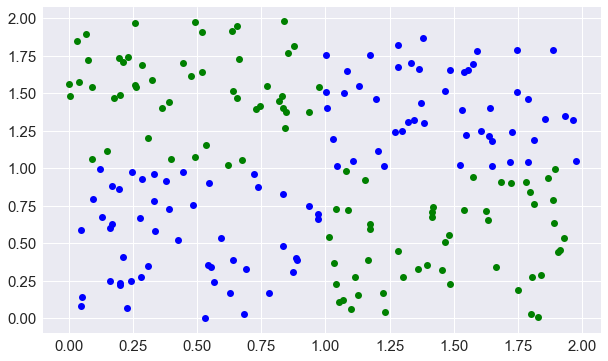

In [2]:
x = np.vstack((np.random.uniform(size=100).reshape((50,2)), np.random.uniform(size=100).reshape((50,2)) + 1)) 
plt.figure(figsize=(10, 6))
plot(x[:,0], x[:,1], 'bo')
y1 = np.random.uniform(size=100).reshape((50,2))
y2 = np.random.uniform(size=100).reshape((50,2))
y1[:,0] += 1
y2[:,1] += 1
plot(y2[:,0], y2[:,1], 'go')
plot(y1[:,0], y1[:,1], 'go')

** Задача 2**:   Какое ядро приведёт к линеаризации следующего датасета?

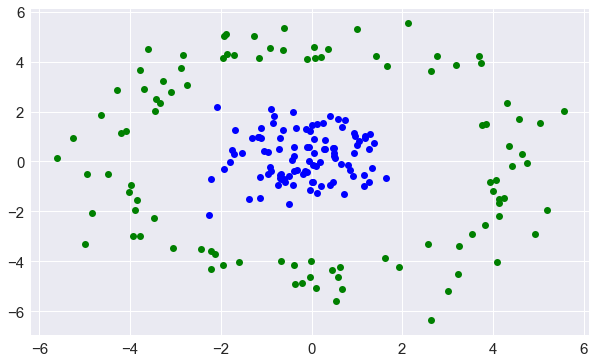

In [3]:
x = np.random.randn(100, 2)
r = np.abs(np.random.randn(100)) + 4
fi = np.random.uniform(0.0, 2 * np.pi, size = 100)
y = np.vstack((r * np.cos(fi), r * np.sin(fi))).T
plt.figure(figsize=(10, 6))
plot(x[:,0], x[:,1], 'bo')
plot(y[:,0], y[:,1], 'go')

### Example of RBF kernel
<a href='http://cs.stanford.edu/people/karpathy/svmjs/demo/'>Demo SVM</a>

------
# Multiclass SVM
## $$ Y = \{1,..., K\}$$
Более детально см 3.2.2 <a href="http://www.machinelearning.ru/wiki/images/8/8e/Sem6_linear_2014.pdf"> здесь <a>

** Вопросы **
    * Как построить SVM для мультиклассовой задачи классификации?
    * Какие недостатки у подходов One-to-One и One-to-All?
    * В чём идея мультиклассового SVM?

## Решающее правило
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/imagemap.jpg" width="80%">

### Интерпретация
<img src="https://raw.githubusercontent.com/shevkunov/ml-mipt-part1/master/2017/seminars/08-linear_models/496/pic/pixelspace.jpeg" width="80%">

<h1 align="center"> SVM Realization </h1>

#  SVM в Sklearn

In [2]:
all_categories = fetch_20newsgroups().target_names
all_categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = [
    'sci.electronics',
    'sci.space',
    'sci.med'
]
train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2)) 

In [9]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [10]:
from sklearn.pipeline import Pipeline

In [11]:
pipeline = Pipeline([("vectorizer", CountVectorizer(min_df=5, ngram_range=(1, 2))), ("algo", SVC())])

In [12]:
pipeline.fit(train_data.data, train_data.target)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [13]:
accuracy_score(pipeline.predict(test_data.data), test_data.target)

0.4175824175824176

** Задание **

1. Сравнить SVC с LinearSVC
2. Разобраться, какое ядро использует SVC по умолчанию
3. Объяснить, почему SVC работает настолько хуже в этом примере

# Реализация simple SVM
см. my_svm.ipynb

# The true SVM

In [3]:
!pip install cvxopt  # Convex optimization package

In [5]:
from collections import Counter
from itertools import product #, izip

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC

# import time
from cvxopt import matrix, solvers

In [6]:
X, y = datasets.make_classification(n_samples=10000, n_features=20, n_classes=2, n_informative=20, n_redundant=0,
                                    random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print("len(X) = {}, len(y) = {}".format(len(X), len(y)))
print("len(X_train) = ", len(X_train))

len(X) = 10000, len(y) = 10000
len(X_train) =  8000


In [7]:
Y_train.shape

(8000,)

### QP-solver (cvxopt)

* [Библиотека CVXOPT](http://cvxopt.org/)
* [Документация библиотеки](http://cvxopt.org/documentation/index.html)
* [Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

In [8]:
def smo_svm(X, Y, C = 1.0, kernl = lambda a, b : np.dot(a.T, b), max_passes = 100, tol = 1e-12):
    lambd = np.zeros(len(X))
    b = 0.0
    
    passes = 0
    iters = 0
    while passes < max_passes:
        
        if iters > 10000:
            print("10000 iters!!!")
            break
            
        num_changed_lambds = 0
        
        # for objects in Learning Sample
        for i in range(len(X) - 1):

            Ei = svm_func(X[i,:], X, Y, lambd, b) - Y[i]
            
            if Y[i] * Ei < -tol and lambd[i] < C or Y[i] * Ei > tol and lambd[i] > 0.0:
                j = np.random.randint(i + 1, len(X))
                
                # print("optimizing %d %d" % (i, j))
                
                Ej = svm_func(X[j,:], X, Y, lambd, b) - Y[j]
                lambd_i_old = lambd[i]
                lambd_j_old = lambd[j]
                if (Y[i] != Y[j]):
                    L = max(0,lambd[j] - lambd[i])
                    H = min(C, C + lambd[j] - lambd[i])
                else:
                    L = max(0,lambd[i] + lambd[j] - C)
                    H = min(C,lambd[i] + lambd[j])
                    
                if (L == H):
                    continue
                    
                nu = 2 * kernl(X[i,:], X[j,:]) - kernl(X[i,:], X[i,:]) - kernl(X[j,:], X[j,:])
                
                if nu >= 0.0:
                    continue
                
                lambd[j] = lambd[j] - (Y[j] * (Ei - Ej)) / (nu)
                
                if lambd[j] > H:
                    lambd[j] = H
                
                if lambd[j] < L:
                    lambd[j] = L
                    
                if abs(lambd[j] - lambd_j_old) < 1e-7:
                    continue
                    
                lambd[i] = lambd[i] + Y[i] * Y[j] * (lambd_j_old - lambd[j])
                
                b1 = b - Ei - Y[i] * (lambd[i] - lambd_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (lambd[j] - lambd_j_old) * kernl(X[i,:], X[j,:])

                b2 = b - Ej - Y[i] * (lambd[i] - lambd_i_old) * kernl(X[i,:], X[i,:])\
                    - Y[j] * (lambd[j] - lambd_j_old) * kernl(X[j,:], X[j,:])
                    
                if 0.0 < lambd[i] and lambd[i] < C:
                    b = b1
                elif 0.0 < lambd[j] and lambd[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                    
                num_changed_lambds = num_changed_lambds + 1
            
            iters += 1
            if iters % 10 == 0:
                print("%d iters done" % iters)
            if num_changed_lambds == 0:
                passes += 1
            else:
                passes = 0
            

    return lambd, b

In [9]:
def svm_func(x, X, Y, lambd, b, ind = None, kernl = lambda a, b : np.dot(a.T, b)):
    if ind is None:
        ind = range(len(X));
    res = 0.0
    for i in range(len(lambd)):
        res += lambd[i] * Y[ind[i]] * kernl(X[ind[i],:], x)
    return res + b

In [10]:
# The real_SVM
def the_svm(X, Y, C = 1.0, kernl = lambda a , b : np.dot(a.T, b)):

    n_samples, n_features = X.shape

    M = np.zeros((n_samples, n_samples))

    for i in range(len(X)):
        for j in range(len(X)):
            M[i, j] = kernl(X[i,:], X[j,:]) * Y[i] * Y[j]
    
    P = cvxopt.matrix(M)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(Y, (1,n_samples))
    b = cvxopt.matrix(0.0)

    tmp1 = np.diag(np.ones(n_samples) * -1)
    tmp2 = np.identity(n_samples)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(n_samples)
    tmp2 = np.ones(n_samples) * C
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    lambd = np.ravel(solution['x'])

    sv = lambd > 1e-5
    ind = np.arange(len(lambd))[sv]
    lambd = lambd[sv]
    svec = X[sv]
    svec_y = Y[sv]

    b = 0.0
    for n in range(len(lambd)):
        b += sv_y[n]
        b -= np.sum(lambd * sv_y * K[ind[n],sv])
    b /= len(lambd)
    
    return lambd, b, sv, sv_y, ind

In [11]:
x = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 1.4]])
y = np.array([1.0, -1.0, 1.0, -1.0])

In [12]:
lambd, b = smo_svm(x, y, C=100.0)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done
140 iters done
150 iters done


(array([0.29588265, 0.78277329, 1.70411739, 1.21722671]), 1.0)

[0. 0.] 1.0
[1. 0.] -1.0
[0. 1.] 1.0
[1.  1.4] -1.0


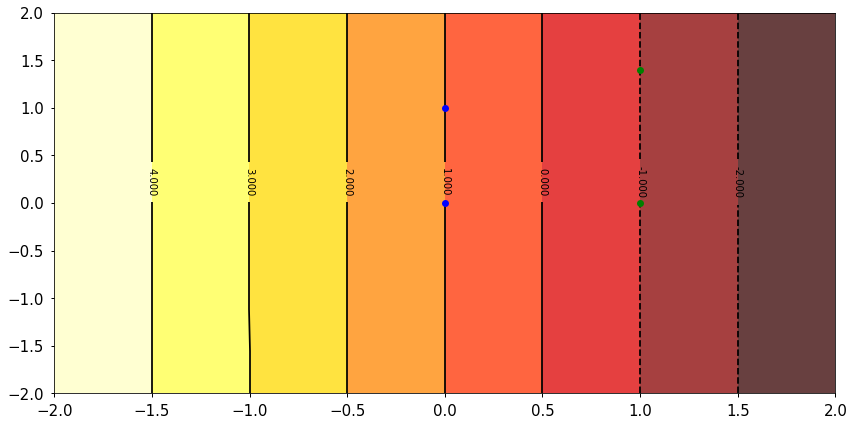

In [13]:
n = 10
xx = np.linspace(-2, 2, n)
yy = np.linspace(-2, 2, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in range(len(xx)):
    for j in range(len(xx)):
        F[j, i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b)
plt.figure(figsize=(14, 7))
contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black'), inline=1, fontsize=10)
for i in range(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
        print(x[i,:], y[i])
    else:
        plot(x[i, 0], x[i,1], 'go')
        print(x[i,:], y[i])

In [14]:
x = np.random.randn(20,2)
x[10:,0] += 3
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [15]:
lambd, b = smo_svm(x, y, C=10.0)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done
140 iters done
150 iters done
160 iters done
170 iters done
180 iters done
190 iters done
200 iters done
210 iters done
220 iters done
230 iters done
240 iters done
250 iters done
260 iters done
270 iters done
280 iters done
290 iters done
300 iters done
310 iters done
320 iters done
330 iters done
340 iters done
350 iters done
360 iters done
370 iters done
380 iters done
390 iters done
400 iters done
410 iters done


(array([ 0.00000000e+00,  0.00000000e+00, -1.38777878e-17,  2.64223129e-01,
         0.00000000e+00,  0.00000000e+00,  5.84666925e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.24699303e+00,
         0.00000000e+00,  0.00000000e+00,  4.86389934e+00,  0.00000000e+00]),
 5.430591994773475)

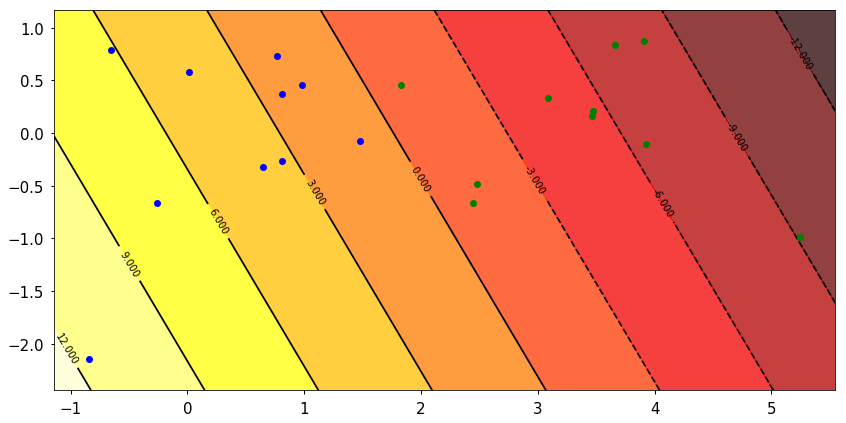

In [16]:
n = 10
xx = np.linspace(np.min(x[:,0])-0.3, np.max(x[:,0]) + 0.3, n)
yy = np.linspace(np.min(x[:,1])-0.3, np.max(x[:,1]) + 0.3, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in range(len(xx)):
    for j in range(len(xx)):
        F[j,i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b)

plt.figure(figsize=(14, 7))
contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black'), inline=1, fontsize=10)
for i in range(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
    else:
        plot(x[i, 0], x[i,1], 'go')

In [17]:
x = np.random.randn(20,2)
x[10:,0] += 2
x[10:,:] *= 1
y = np.hstack((np.ones(10), np.ones(10) * -1))

In [18]:
def polynomial_kernel(x, y, p=2):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, gamma=0.1):
    return (np.exp(-gamma*np.dot(x-y, x-y)))

In [19]:
# Learn Kernel SVM
lambd, b = smo_svm(x, y, C=10.0, kernl=polynomial_kernel)
lambd, b

10 iters done
20 iters done
30 iters done
40 iters done
50 iters done
60 iters done
70 iters done
80 iters done
90 iters done
100 iters done
110 iters done
120 iters done
130 iters done
140 iters done
150 iters done
160 iters done
170 iters done
180 iters done
190 iters done
200 iters done
210 iters done
220 iters done
230 iters done
240 iters done
250 iters done
260 iters done
270 iters done
280 iters done
290 iters done
300 iters done
310 iters done
320 iters done
330 iters done
340 iters done
350 iters done
360 iters done
370 iters done
380 iters done
390 iters done
400 iters done
410 iters done
420 iters done
430 iters done
440 iters done
450 iters done
460 iters done
470 iters done
480 iters done
490 iters done
500 iters done
510 iters done
520 iters done
530 iters done
540 iters done
550 iters done
560 iters done
570 iters done
580 iters done
590 iters done
600 iters done
610 iters done
620 iters done
630 iters done
640 iters done
650 iters done
660 iters done
670 iters done
680 

(array([1.00000000e+01, 2.49800181e-16, 0.00000000e+00, 8.62379338e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+01, 0.00000000e+00, 6.46810011e+00,
        1.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+01, 2.15569327e+00]),
 2.895924148545535)

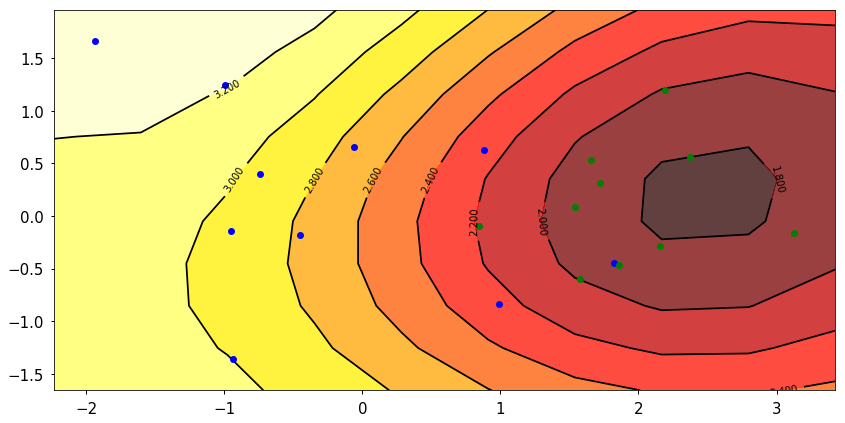

In [20]:
# Draw polynomial Kernel
n = 10
xx = np.linspace(np.min(x[:,0])-0.3, np.max(x[:,0]) + 0.3, n)
yy = np.linspace(np.min(x[:,1])-0.3, np.max(x[:,1]) + 0.3, n)
XX, YY = np.meshgrid(xx, yy)

F = np.zeros_like(XX)
for i in range(len(xx)):
    for j in range(len(xx)):
        F[j,i] = svm_func(np.array([xx[i], yy[j]]), x, y, lambd, b, kernl=gaussian_kernel)

plt.figure(figsize=(14, 7))
contourf(xx, yy, F, 8, alpha=.75, cmap=cm.hot)
clabel(contour(xx, yy, F, 8, colors='black'), inline=1, fontsize=10)
for i in range(len(x)):
    if y[i] == 1.0:
        plot(x[i,0], x[i,1], 'bo')
        #print x[i,:], y[i]
    else:
        plot(x[i, 0], x[i,1], 'go')
        #print x[i,:], y[i]

<h1 align="center"> Additional </h1>

## Разбор прикладной задачи: оптимизация бюджета рекламной кампании
<img src="https://zhazhda.biz/wp-content/uploads/2017/03/bolshaya-1.png" width=40%>

К вам обращается крупное рекламное агентство. Они хотят пускать рекламную кампанию по телевизору, однако, не понимают сколько рекламы на каждом телевизионном канале (всего телеканалов $n$) нужно заказать.

* ** Бизнес-ограничения **
    1. У каждой рекламной кампании есть своя целевая аудитория, и успешность мероприятия определяется по показателям в срезе ЦА.
    2. Для каждого среза считается величина «охват k+» - сколько человек посмотрело рекламный ролик k и более раз и «точность» сколько людей, просмотревших ролик из данного среза.
    3. Упрощение задачи: считаем, что на телеканале не покупается фиксированная реклама (когда мы точно знаем когда будет ролик показан), а только плавающие размещения (ролик будет показан в случайный момент суток)
    4. Нужно оптимизировать суммарный бюджет кампании, получив определённые значения охвата 5+ и точности ЦА.
    
* ** Как измерить результат **
    1. Проверять экономию бессмысленно (так как мы, в любом случае, тратим меньше). Надо проверять охват и точность.
    2. АБ тест нельзя просто так сделать, кампания это очень долгий процесс (2-3 месяца)
    3. Можно требовать, чтобы с вероятностью 95% охват и точность были не ниже, чем те, что мы предсказали.
    
* **Вопросы:**
    1. Как поставить задачу машинного обучения? Что есть целевая переменная?
    2. Какие признаки следует добавить в обучающую выборку? Сколько их будет?
    3. Какое взять решающее правило?
    4. Если до сих пор было всего 20 кампаний, какое тогда решающее правило взять?

# HW2: solution

# HW5: explanation


<h1 align="center">Заключение</h1>  

** SVM **
* Достоинства
    - Сильная обощающая способность
    - Выпуклая задача оптимизация (наличие решения)
    - Не нужны все объекты обучающей выборки для обучения
* Недостатки:
    - Непонятно, как подбирать ядро



** Обратная связь ** 
  * оцените <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> семинар </a>
  * оставьте <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции